In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
class SLR:
    def __init__(self,lr=0.1,max_iter=2000):
        self.lr=lr
        self.max_iter=max_iter
        self.weight=0
        self.bias=0

    def fit(self,X,y):
        m=len(X)
        cost_history=[]
        for i in range(self.max_iter):
            y_pred=self.weight*X+self.bias
            errors=y_pred-y
        #Find W and B Gradient
            w_grad=(1/m)*np.sum(errors*X)
            b_grad=(1/m)*np.sum(errors)

            #Update weight and bias

            self.weight-=self.lr*w_grad
            self.bias-=self.lr*b_grad

            #Compute Cost
            cost=np.sum(errors**2)/(2*m)
            cost_history.append(cost)
        return cost_history

    def predict(self,X):
        return self.weight*X+self.bias

    def plot_results(self, X, y, cost_history):
        y_pred = self.predict(X)
        residuals = y - y_pred  # Calculate residuals for model performance plot

        # Create a figure with 2x2 grid for subplots
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        # Plot 1: Actual Data
        axs[0, 0].scatter(X, y, color='blue')
        axs[0, 0].set_title('Actual Data')
        axs[0, 0].set_xlabel('X - Input Variable')
        axs[0, 0].set_ylabel('y - Target Variable')

        # Plot 2: Model with Actual Data
        axs[0, 1].scatter(X, y, color='blue', label='Actual Data')
        axs[0, 1].plot(X, y_pred, color='red', label='Regression Line')
        axs[0, 1].set_title('Model with Data')
        axs[0, 1].set_xlabel('X - Input Variable')
        axs[0, 1].set_ylabel('y - Target Variable')
        axs[0, 1].legend()

        # Plot 3: Cost Function over Iterations
        axs[1, 0].plot(range(len(cost_history)), cost_history, color='green')
        axs[1, 0].set_title('Cost Function Over Time')
        axs[1, 0].set_xlabel('Iterations')
        axs[1, 0].set_ylabel('Cost (MSE)')

        # Plot 4: Model Performance (Residuals)
        axs[1, 1].scatter(X, residuals, color='purple')
        axs[1, 1].hlines(y=0, xmin=min(X), xmax=max(X), linestyles='dashed')
        axs[1, 1].set_title('Residuals (Model Performance)')
        axs[1, 1].set_xlabel('X - Input Variable')
        axs[1, 1].set_ylabel('Residuals')

        # Adjust layout to avoid overlap
        plt.tight_layout()

        # Show the plots
        plt.show()


In [6]:
def min_max_scaling(X):
    min_values = np.min(X, axis=0)
    max_values = np.max(X, axis=0)
    normalized_X = (X - min_values) / (max_values - min_values)
    return normalized_X

def z_score_standardization(X):
    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    normalized_X = (X - mean_values) / std_values
    return normalized_X

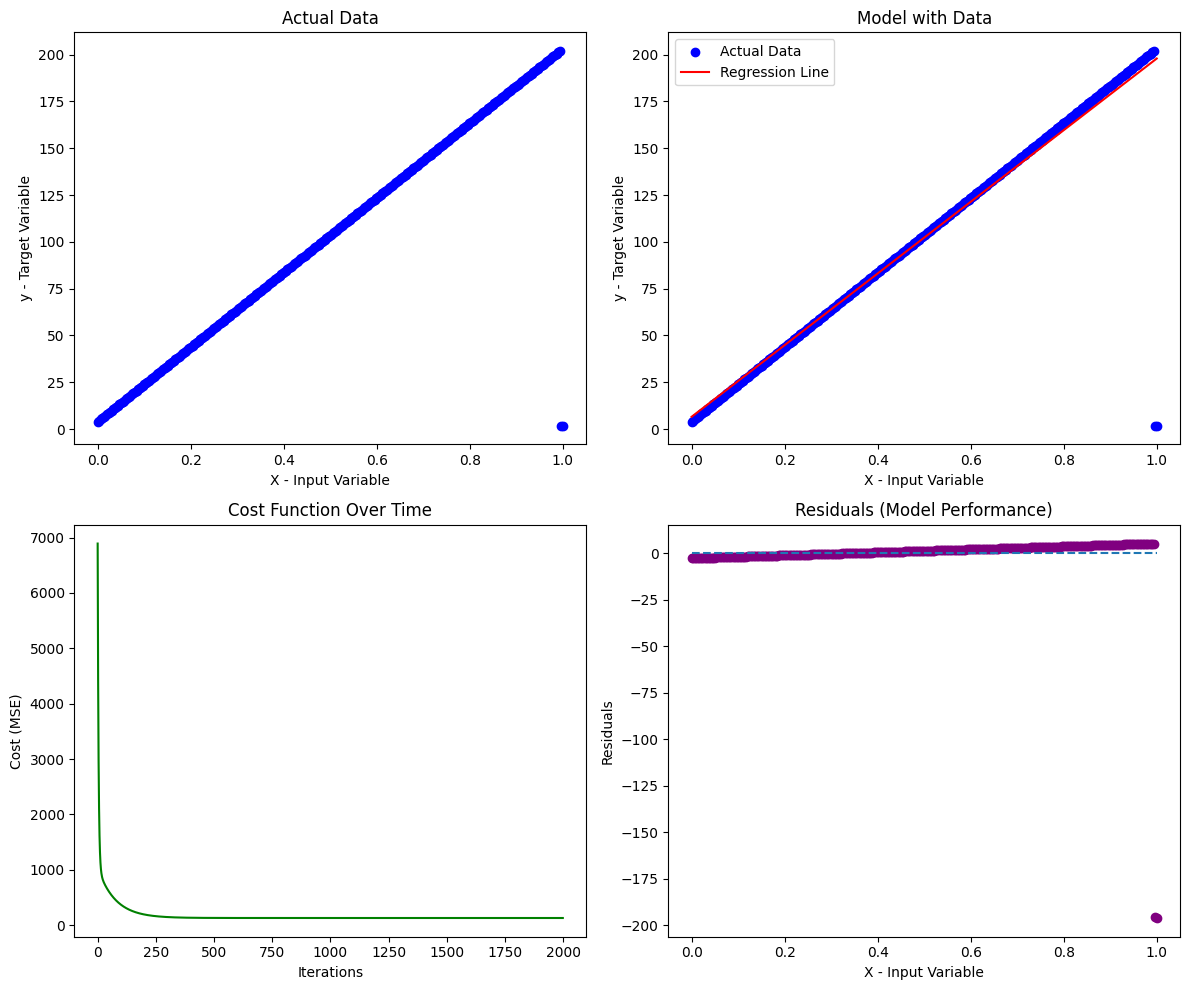

Sample Pridection for x = 3 is [580.64849499] 
Final Weight (m): 191.3731722307973
Final Bias (b): 6.528978294088519


In [9]:
data=pd.read_csv('/content/Linear Regression - Sheet1.csv')
X=data["X"].values
y=data["Y"].values
X=min_max_scaling(X)
# X=z_score_standardization(X)
model=SLR()
cs=model.fit(X,y)
model.plot_results(X,y,cs)

print(f"Sample Pridection for x = 3 is {model.predict(np.array([3]))} ")

print("Final Weight (m):", model.weight)
print("Final Bias (b):", model.bias)
